In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
import re
import os
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
# sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

sys.path.append("/home/rame/domainbedv2/")
from domainbed.codeplot import plot
plot.plt.style.use('default')
sys.path.append("/data/rame/logs_experiments_notebook/nlp")

In [2]:
plot.dict_key_to_label.update(
    {
        "pos1": "Review positivity",
        "posimdb": "lvwerra/distilbert-imdb",
        "pos": "distilbert-base-uncased-finetuned-sst-2-english",
        "toxic": "martin-ha/toxic-comment-model",
        "quality2": "valurank/distilbert-quality",
        # "hfl": "OpenAssistant/reward-model-deberta-v3-large-v2",
        # "hfb":  r"$HF_1$ (deberta)",
        # "hfd": r"$HF_2$ (electra)",
        # "hfg": "sugam11/gpt2-rlhf-reward",
        # "cogd": r"$HF_2$ (bart)",
        # "tristan": r"$HF_1$ (gpt2)",
    }
)
# plot.plt.rcParams["figure.figsize"] = (7, 7)
# plot.SIZE_AXIS = "small"
# plot.SIZE = "small"
plot.plt.rcParams["figure.figsize"] = (6, 6)
SIZE="large"
SIZE_AXIS="xx-large"


colormaps = [
    "Reds", "Blues", "Greens", "Oranges", "Greys", "Purples", "Reds", "Blues", "Greens", "Oranges",
    "Greys", "Purples",
"Yellows",
"Light_Yellows",
"Dark_Blues",
"Blues_Greys",
"Dark_Greys",
] * 2
do_save = False


In [3]:
# llama stack

In [4]:
os.listdir("/data/rame/logs_experiments_notebook/nlp/llamastack/")

['steps0_0406.py',
 'wainitto1_0406.py',
 'steps0_bs126_0411.py',
 '__pycache__',
 'wa0to1_0406_step241.py',
 'wa0to1_0406.py',
 'steps1_0406.py',
 'wainitto0_0406.py',
 'multi01steps_0406.py',
 'steps0v2_0406.py',
 'llama_experiment_stack.py']

In [5]:
from llamastack import steps1_0406, wainitto1_0406, wa0to1_0406_step241, wa0to1_0406, wainitto0_0406, steps0_0406, multi01steps_0406, steps0_bs126_0411, steps0v2_0406

In [9]:
modules_stack = [
steps0_bs126_0411, steps0_0406, steps0v2_0406, wainitto0_0406, steps1_0406, wainitto1_0406, wa0to1_0406_step241, wa0to1_0406, multi01steps_0406
]

In [14]:
for modules in [modules_stack]:
    for module in modules:
        module.l = []
        if not hasattr(module, "label"):
            module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[0:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["gpt2"] = module.d[key][0]["LABEL_0"]
                new_d["hfb"] = module.d[key][1]["REWARD"]
                module.l.append(new_d)

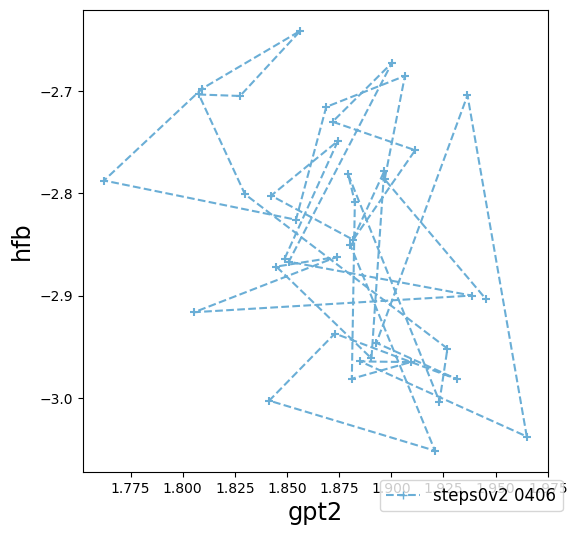

In [15]:
fig_dr = plot.plot_key(
    [module.l for module in modules_stack],
    key_x="gpt2",
    key_y="hfb",
    # list_indexes=[2],
    labels=[module.label for module in modules_stack],
    loc=(1.05, 0),
    colormaps=["Purples", "Blues", "Blues", "Reds", "Reds", "Greens", "Greens", "Purples", "Greys"],
    linestyles=["solid", "solid", "dashed", "solid", "dashed", "solid", "dotted", "dashdot", "dashdot"],
    connect_endpoints=False,
    order="connect",
    # order="savgol_3_1_quadratic",
)
plot.save_fig(fig=fig_dr, name="stack/pareto_stack_gpt2hfb.pdf", do_save=do_save)

In [10]:
# LLama assistant

In [6]:
os.listdir("/data/rame/logs_experiments_notebook/nlp/llamaassistant/")

['logs_assistantsteps_hfb_kl005_fmulti_normallr.py',
 'logs_assistantsteps_hfb_kl005_fmulti.py',
 'logs_assistant_wabkltodkl_0410.py',
 'llama_experiments_assistant.py',
 'logs_assistant_d_kl_steps.py',
 '__pycache__',
 'logs_assistantsteps_hfd_kl005_fmulti_normallr.py',
 'logs_assistant_d_steps.py',
 'logs_assistant_b_steps.py',
 'logs_assistant_bd_wa.py',
 'logs_assistantsteps_hfd_kl005_fmulti.py',
 'logs_assistant_bkl_steps_0406.py',
 'logs_assistant_multikl_steps_0406.py',
 'logs_assistant_wainittobkl_0406.py',
 'logs_assistant_wainittodkl.py']

In [16]:
from llamaassistant import logs_assistant_d_kl_steps, logs_assistant_d_steps, logs_assistant_b_steps, logs_assistant_bd_wa, logs_assistant_wainittodkl, logs_assistant_bkl_steps_0406, logs_assistant_multikl_steps_0406, logs_assistant_wainittobkl_0406, logs_assistant_wabkltodkl_0410, logs_assistantsteps_hfb_kl005_fmulti_normallr, logs_assistantsteps_hfb_kl005_fmulti, logs_assistantsteps_hfd_kl005_fmulti_normallr, logs_assistantsteps_hfd_kl005_fmulti

In [36]:
modules_assistant_nokl = [
    logs_assistant_d_steps,
    logs_assistant_b_steps,
    logs_assistant_bd_wa
]

modules_assistant = [
    logs_assistant_bkl_steps_0406, logs_assistant_wainittobkl_0406, logs_assistant_d_kl_steps,
    logs_assistant_wainittodkl, logs_assistant_multikl_steps_0406, logs_assistant_wabkltodkl_0410
]
modules_assistant_multi = [
    logs_assistant_multikl_steps_0406,
    logs_assistantsteps_hfb_kl005_fmulti_normallr,
    logs_assistantsteps_hfb_kl005_fmulti,
    logs_assistantsteps_hfd_kl005_fmulti_normallr,
    logs_assistantsteps_hfd_kl005_fmulti
]



In [37]:
for modules in [modules_assistant_nokl, modules_assistant_multi, modules_assistant]:
    for module in modules:
        module.l = []
        if not hasattr(module, "label"):
            module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["hfl"] = module.d[key][0]["LABEL_0"]
                new_d["hfb"] = module.d[key][1]["REWARD"]
                new_d["hfd"] = module.d[key][2]["REWARD"]
                module.l.append(new_d)

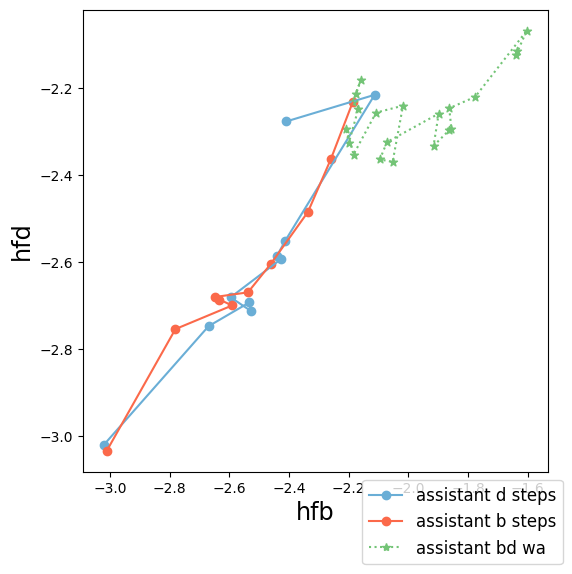

In [32]:
fig_dr = plot.plot_key(
    [module.l for module in modules_assistant_nokl],
    # list_indexes=[0,2,4,5],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_assistant_nokl],
    loc=(1.05, 0),
    colormaps=["Blues", "Reds", "Greens"],
    linestyles=["solid", "solid", "dotted"],
    connect_endpoints=False,
    order="connect",
    # order="savgol_3_1_quadratic",
)
plot.save_fig(fig=fig_dr, name="assistant/pareto_assistant_nokl_hfbhfd.pdf", do_save=do_save)

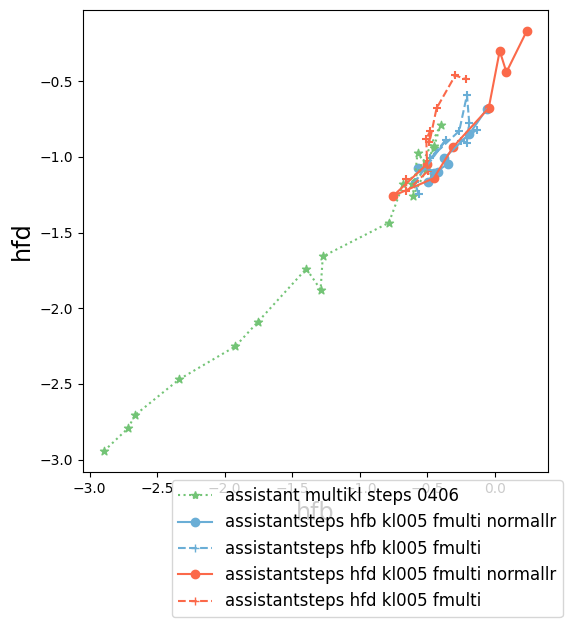

In [24]:
fig_dr = plot.plot_key(
    [module.l for module in modules_assistant_multi],
    # list_indexes=[0,2,4,5],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_assistant_multi],
    loc=(1.05, 0),
    colormaps=["Greens", "Blues", "Blues", "Reds", "Reds"],
    linestyles=["dotted", "solid", "dashed", "solid", "dashed"],
    connect_endpoints=False,
    order="connect",
    # order="savgol_3_1_quadratic",
)
plot.save_fig(fig=fig_dr, name="assistant/pareto_assistant_multi_hfbhfd.pdf", do_save=do_save)

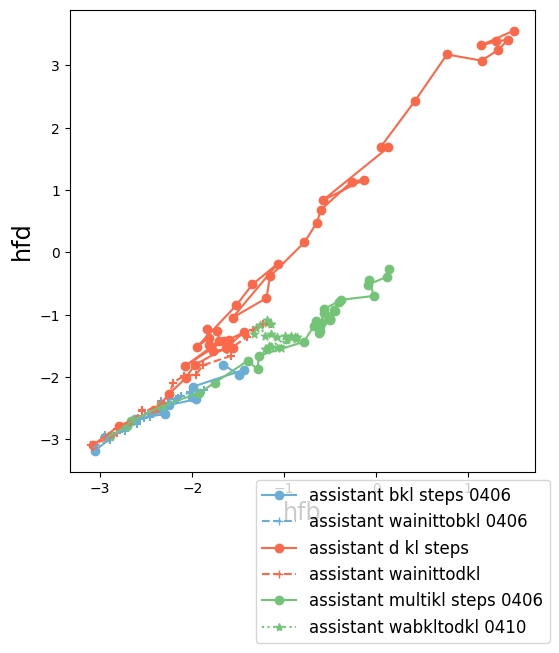

In [38]:
fig_dr = plot.plot_key(
    [module.l for module in modules_assistant],
    # list_indexes=[0,2,4,5],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_assistant],
    loc=(1.05, 0),
    colormaps=["Blues", "Blues", "Reds", "Reds", "Greens", "Greens", "Purples", "Greys"],
    linestyles=[
        "solid", "dashed", "solid", "dashed", "solid", "dotted", "dashdot", "dashdot"
    ],
    connect_endpoints=False,
    order="connect",
    # order="savgol_3_1_quadratic",
)
plot.save_fig(fig=fig_dr, name="assistant/pareto_assistant_hfbhfd.pdf", do_save=do_save)

# Llama Summary news

In [39]:
from llamasummarynews import  logs_summarynew_alpaca_tristan, logs_summarynew_alpaca_cog, logs_summarynew_tristan_steps, logs_summarynew_cog_steps, logs_summarynew_tristan_cog, logs_summarynew_multi, logs_snew_multi_cog, logs_snew_multi_tristan

In [40]:
modules_summary_news = [
    logs_summarynew_tristan_steps, logs_summarynew_alpaca_tristan, logs_summarynew_cog_steps,
    logs_summarynew_alpaca_cog, logs_summarynew_multi, logs_summarynew_tristan_cog,
    logs_snew_multi_cog, logs_snew_multi_tristan
]


In [41]:
for modules in [modules_summary_news]:
    for module in modules:
        module.l = []
        if not hasattr(module, "label"):
            module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["tristan"] = module.d[key][0]["LABEL_0"]
                new_d["cogd"] = module.d[key][1]["FAITHFUL"] - module.d[key][1]["HALLUCINATED"]
                new_d["cogfaithful"] = module.d[key][1]["FAITHFUL"]
                module.l.append(new_d)

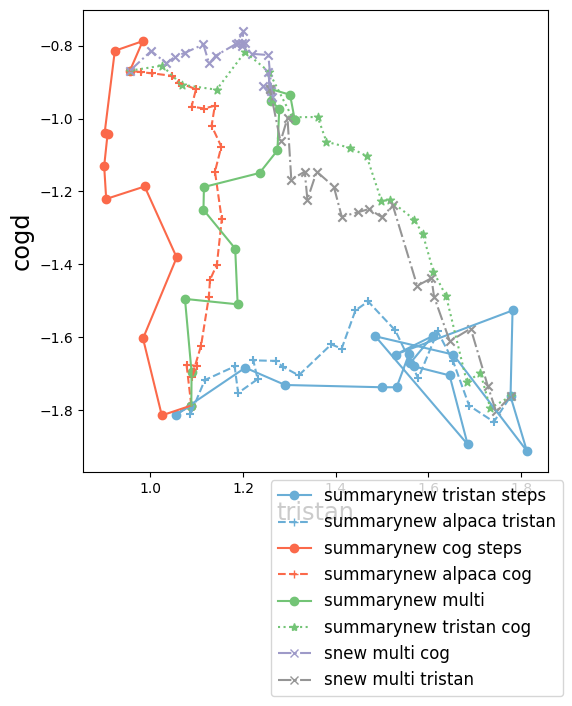

In [42]:
fig_dr = plot.plot_key(
    [module.l for module in modules_summary_news],
    key_y="cogd",
    key_x="tristan",
    labels=[module.label for module in modules_summary_news],
    loc=(1.05, 0),
    colormaps=["Blues", "Blues", "Reds", "Reds", "Greens", "Greens", "Purples", "Greys"],
    linestyles=["solid", "dashed", "solid", "dashed", "solid", "dotted", "dashdot", "dashdot"],
    connect_endpoints=False,
    order="connect",
    # order="savgol_3_1_quadratic",
    # order=2
)
plot.save_fig(fig=fig_dr, name="summary/pareto_summarynews_tristancogd.pdf", do_save=do_save)

# Llama Summary

In [43]:
from llamasummary import logs_tristan_cog_step20_v0, logs_tristan_cog_step40_kl005, logs_tristan_cog_step40, logs_tristan_cog_step30, logs_tristan_cog_step40_v0, logs_cogsoups_step40, logs_alpaca_cogsoups_step40, logs_alpaca_cog, logs_alpaca_cog_kl005, logs_tristan_cog_stepend, logs_alpaca_tristan_kl005, logs_multi_step40_200_kl005, logs_multitask_tristan_190_200, logs_multitask_cog_190_200, logs_cog_steps_200, logs_tristan_steps_200

In [44]:
modules_summary_debug = [
    logs_tristan_cog_step40_kl005, logs_tristan_cog_step40, logs_tristan_cog_stepend,
    logs_tristan_cog_step30, logs_alpaca_cog, logs_alpaca_cog_kl005, 
]
modules_summary = [
    logs_tristan_steps_200,
    logs_alpaca_tristan_kl005,
    logs_cog_steps_200,
    logs_alpaca_cog_kl005,
    logs_multi_step40_200_kl005,
    logs_tristan_cog_step40_kl005,
    logs_multitask_tristan_190_200,
    logs_multitask_cog_190_200]
modules_summary_soups = [logs_alpaca_cogsoups_step40, logs_cogsoups_step40]

In [45]:
for modules in [modules_summary, modules_summary_soups]:
    for module in modules:
        module.l = []
        if not hasattr(module, "label"):
            module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["tristan"] = module.d[key][0]["LABEL_0"]
                new_d["cogd"] = module.d[key][1]["FAITHFUL"] - module.d[key][1]["HALLUCINATED"]
                new_d["cogfaithful"] = module.d[key][1]["FAITHFUL"]
                module.l.append(new_d)

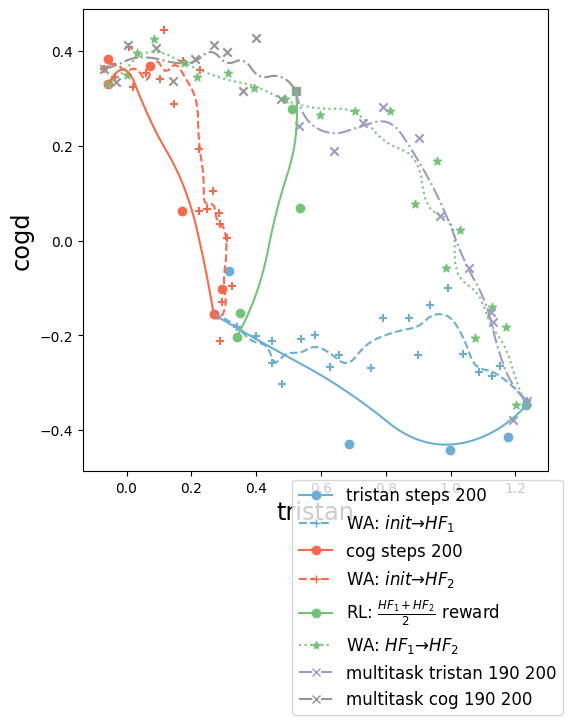

In [46]:
fig_dr = plot.plot_key(
    [module.l for module in modules_summary],
    key_y="cogd",
    key_x="tristan",
    labels=[module.label for module in modules_summary],
    loc=(1.05, 0),
    colormaps=["Blues", "Blues", "Reds", "Reds", "Greens", "Greens", "Purples", "Greys"],
    linestyles=["solid", "dashed", "solid", "dashed", "solid", "dotted", "dashdot", "dashdot"],
    connect_endpoints=False,
    order="savgol_3_1_quadratic",
)
plot.save_fig(fig=fig_dr, name="summary/pareto_summary_tristancogd.pdf", do_save=do_save)

In [ ]:
keys_y = ["tristan", "cogd", "cogfaithful"]

fig_dr = plot.plot_basic_scatter(
    modules_summary[5].l,
    key_x="lambda",
    keys_y=[y for i, y in enumerate(keys_y) if i in [2] or True],
    loc="lower right",
    # keycolor="abs|lambda-0.5",
    # keysize="hfl",
    colormaps=['Blues', "Reds", 'Greens', 'Purples', 'Greys'],
    linestyles=['solid', 'solid', "dotted", 'dotted', 'dotted', "dotted", "dotted", "dotted"],
    order="2",
    legendtitle=f"Rewards for {modules_summary[5].label}:",
    title=None
)

In [ ]:
fig_dr = plot.plot_key(
    [module.l for module in modules_summary_soups],
    key_x="tristan",
    key_y="cogd",
    labels=[module.label for module in modules_summary_soups],
    loc="lower left",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" for i, _ in enumerate(modules_summary_soups)],
    connect_points=True,
    connect_endpoints=True,
    order=2,
)

# LLAMA Review

In [47]:
from llamareview import logs_alpaca_hfb_steps, logs_alpaca_hfb_step190, logs_hfd_steps, logs_alpaca_hfd_step190, logs_multihf, logs_hfb_hfd_step180, logs_hfb_hfd_step190_200, logs_multitask_hfb, logs_multitask_hfd


In [48]:
modules_hfb_hfd_200 = [
    logs_alpaca_hfb_steps,
    logs_alpaca_hfb_step190,
    logs_hfd_steps,
    logs_alpaca_hfd_step190,
    logs_multihf,
    # logs_hfb_hfd_step190_200,
    logs_hfb_hfd_step180,
    logs_multitask_hfb,
    logs_multitask_hfd,    
]


In [49]:
for modules in [
    modules_hfb_hfd_200
]:
    for module in modules:
        module.l = []
        if not hasattr(module, "label"):
            module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["pos0"] = module.d[key][0]["POSITIVE"]
                new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
                new_d["pos1"] = module.d[key][1]["POSITIVE"]
                new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
                new_d["toxic"] = module.d[key][2]["toxic"]
                new_d["nontoxic"] = module.d[key][2]["non-toxic"] - module.d[key][2]["toxic"]
                new_d["quality"] = module.d[key][3]["good"]
                new_d["quality1"] = module.d[key][3]["medium"]
                new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
                new_d["hfl"] = module.d[key][4]["LABEL_0"]
                new_d["hfb"] = module.d[key][5]["REWARD"]
                new_d["hfd"] = module.d[key][6]["REWARD"]
                new_d["hfg"] = module.d[key][7]["LABEL_0"]
                if len(module.d[key]) >= 9:
                    new_d["toxicnew"] = module.d[key][8]["toxic"]
                module.l.append(new_d)

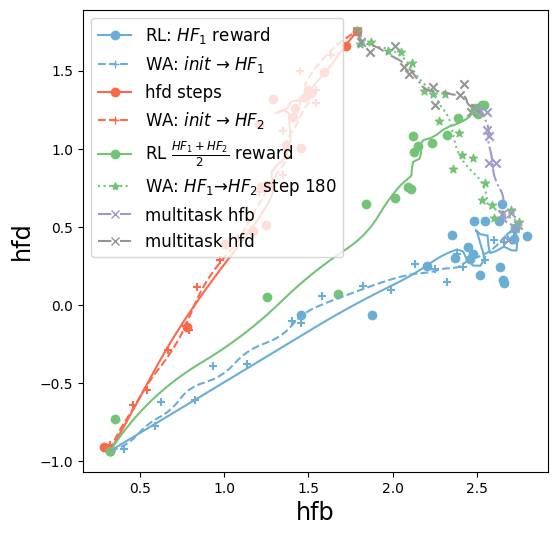

In [50]:
fig_dr = plot.plot_key(
    [module.l for module in modules_hfb_hfd_200],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_hfb_hfd_200],
    loc="upper left",
    # keycolor="abs|lambda-0.5",
    # keysize="hfl",
    colormaps=['Blues', 'Blues', "Reds", "Reds", 'Greens', 'Greens', 'Purples', 'Greys'],
    linestyles=[
        'solid', 'dashed', "solid", 'dashed', 'solid', "dotted", "dashdot", "dashdot"
    ],
    # order="2",
    order="savgol_3_1_quadratic",
    # order="connect",
    connect_endpoints=False,
)
plot.save_fig(fig=fig_dr, name="review/pareto_review_hfbhfd.pdf", do_save=do_save)

In [ ]:
modules_hfb_hfd_200[6].l[0]

In [ ]:
modules_hfb_hfd_200[6].label

In [ ]:
keys_y = ["hfb", "hfd", "hfl", "hfg"]

fig_dr = plot.plot_basic_scatter(
    modules_hfb_hfd_200[5].l,
    key_x="lambda",
    keys_y=[y for i, y in enumerate(keys_y) if i in [2] or True],
    loc="lower right",
    # keycolor="abs|lambda-0.5",
    # keysize="hfl",
    colormaps=['Blues', "Reds", 'Greens', 'Purples', 'Greys'],
    linestyles=['solid', 'solid', "dotted", 'dotted', 'dotted', "dotted", "dotted", "dotted"],
    order="2",
    legendtitle=f"Rewards for {modules_hfb_hfd_200[5].label}:",
    title=None
)

# Backup

In [ ]:
from llamahf32 import logs_hfb_hfd_step190, logs_hfb_hfd_step10, logs_hfb_hfd_step70, logs_quality2_pos_step140, logs_hfb_hfd_step120, logs_hfb_hfd_step20, logs_hfb_hfd_step170, logs_alpaca_hfb_noref_step90, logs_quality2_hfb_step10, logs_alpaca_hfd_noref_step90, logs_hfb_hfd_noref_step90, logs_quality2_pos_step60, logs_rl_merged_lora8, logs_hfb_hfd_step170_200, logs_hfb_hfd_step170_200_fixed, logs_hfb_hfd_step190_200_fixed, logs_toxic_quality_step40, logs_toxic_quality_step90_200, logs_alpaca_toxic_quality_step90_200, logs_toxic_step90, logs_pos_step90, logs_toxic_step190, logs_toxic_hfb_step190

modules = [
    logs_hfb_hfd_noref_step90, logs_alpaca_hfb_noref_step90, logs_alpaca_hfd_noref_step90,
    logs_quality2_hfb_step10
]

modules_toxic = [logs_toxic_hfb_step190, logs_toxic_step90, logs_toxic_step190]
modules_pos = [logs_pos_step90]
modules_quality2_pos = [
    logs_alpaca_toxic_quality_step90_200, logs_toxic_quality_step90_200, logs_toxic_quality_step40,
    logs_quality2_pos_step60, logs_quality2_pos_step140
]
modules_hfb_hfd = [
    logs_hfb_hfd_step10,
    logs_rl_merged_lora8,
    logs_hfb_hfd_step20,
    logs_hfb_hfd_step70,
    logs_hfb_hfd_step120,
    logs_hfb_hfd_step170,
    logs_hfb_hfd_step190,
    logs_hfb_hfd_step170_200_fixed,
    logs_hfb_hfd_step190_200_fixed,
    logs_hfb_hfd_step170_200,
]

In [ ]:
for modules in [
    modules_quality2_pos, modules_toxic, modules_pos, modules_hfb_hfd
]:
    for module in modules:
        module.l = []
        if not hasattr(module, "label"):
            module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["pos0"] = module.d[key][0]["POSITIVE"]
                new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
                new_d["pos1"] = module.d[key][1]["POSITIVE"]
                new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
                new_d["toxic"] = module.d[key][2]["toxic"]
                new_d["nontoxic"] = module.d[key][2]["non-toxic"] - module.d[key][2]["toxic"]
                new_d["quality"] = module.d[key][3]["good"]
                new_d["quality1"] = module.d[key][3]["medium"]
                new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
                new_d["hfl"] = module.d[key][4]["LABEL_0"]
                new_d["hfb"] = module.d[key][5]["REWARD"]
                new_d["hfd"] = module.d[key][6]["REWARD"]
                new_d["hfg"] = module.d[key][7]["LABEL_0"]
                if len(module.d[key]) >= 9:
                    new_d["toxicnew"] = module.d[key][8]["toxic"]
                module.l.append(new_d)

In [ ]:
fig_dr = plot.plot_key(
    [module.l for module in modules_hfb_hfd],
    #list_indexes = [-1],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_hfb_hfd],
    loc="lower left",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" for i, _ in enumerate(modules_hfb_hfd)],
    connect_points=True,
    connect_endpoints=False,
    order=2,
)

In [ ]:
fig_dr = plot.plot_key(
    [module.l for module in modules_pos],
    key_x="pos0",
    key_y="pos1",
    labels=[module.label for module in modules_pos],
    loc="lower left",
    colormaps=colormaps,
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules_pos)],
    connect_points=True,
    order=2,
)

In [ ]:
fig_dr = plot.plot_key(
    [module.l for module in modules_toxic],
    key_x="-toxic",
    key_y="hfb",
    labels=[module.label for module in modules_toxic],
    loc="lower left",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules_toxic)],
    connect_points=True,
    order=2,
)

In [ ]:
fig_dr = plot.plot_key(
    [module.l for module in modules_quality2_pos],
    key_x="nontoxic",
    key_y="qualityd",
    labels=[module.label for module in modules_quality2_pos],
    loc="lower left",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules_quality2_pos)],
    connect_points=True,
    order=2,
)

In [ ]:
do_save = True

# LLAMA HF

In [ ]:
from llamahf import logs_rl_alpaca_hfd_hfb, logs_rl_alpaca_hfd_hfb5, logs_rl_alpaca_hfb_hfd, logs_rl_alpaca_hfb_hfd5, logs_rl_hfb_hfd, logs_rl_alpaca_hfb, logs_rl_alpaca_hfd

In [ ]:
modules = [
    logs_rl_alpaca_hfb_hfd, logs_rl_alpaca_hfb_hfd5, logs_rl_alpaca_hfd_hfb,
    logs_rl_alpaca_hfd_hfb5, logs_rl_hfb_hfd, logs_rl_alpaca_hfb, logs_rl_alpaca_hfd
]
for module in modules:
    module.l = []
    for key in module.d.keys():
        if True:
            new_d = {"lambda": key}
            new_d["pos0"] = module.d[key][0]["POSITIVE"]
            new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
            new_d["pos1"] = module.d[key][1]["POSITIVE"]
            new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
            new_d["toxic"] = module.d[key][2]["toxic"]
            new_d["toxicd"] = module.d[key][2]["toxic"] - module.d[key][2]["non-toxic"]
            new_d["quality"] = module.d[key][3]["good"]
            new_d["quality1"] = module.d[key][3]["medium"]
            new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
            new_d["hfl"] = module.d[key][4]["LABEL_0"]
            new_d["hfb"] = module.d[key][5]["REWARD"]
            new_d["hfd"] = module.d[key][6]["REWARD"]
            module.l.append(new_d)

In [ ]:

fig_dr = plot.plot_key(
    [module.l for module in modules],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules],
    loc="lower left",
    # keycolor="abs|lambda-0.5",
    # keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules)],
    connect_points=True,
    order=2,
)

# LLAMA

In [ ]:
os.listdir("/data/rame/logs_experiments_notebook/llama")

In [ ]:
from llama import logs_rl_quality2_hf, logs_rl_posimdb_pos, logs_rl_hfl_quality2, logs_rl_hfl_hf, logs_rl_alpaca_posimdb, logs_rl_pos_hf, logs_rl_posimdb_quality2, logs_rl_alpaca_quality2, logs_rl_alpaca_hf, logs_rl_posimdb_hf, logs_rl_pos_quality2 

In [ ]:
modules = [
    logs_rl_alpaca_hf,
    logs_rl_alpaca_posimdb,
    logs_rl_posimdb_hf,
    # logs_rl_posimdb_pos,
    logs_rl_pos_hf,
    logs_rl_pos_quality2,
    logs_rl_quality2_hf,
    logs_rl_posimdb_quality2,
    # logs_rl_hfl_hf,
    # logs_rl_hfl_quality2
    logs_rl_alpaca_quality2,
]
for module in modules:
    module.l = []
    for key in sorted(module.d.keys()):
        if 0 <= key <= 1:
            new_d = {"lambda": key}
            new_d["pos0"] = module.d[key][0]["POSITIVE"]
            new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
            new_d["pos1"] = module.d[key][1]["POSITIVE"]
            new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
            new_d["toxic"] = module.d[key][2]["toxic"]
            new_d["toxicd"] = module.d[key][2]["toxic"] - module.d[key][2]["non-toxic"]
            new_d["quality"] = module.d[key][3]["good"]
            new_d["quality1"] = module.d[key][3]["medium"]
            new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
            new_d["hfl"] = module.d[key][4]["LABEL_0"]
            new_d["hfb"] = module.d[key][5]["REWARD"]
            module.l.append(new_d)

In [ ]:
plot.plt.rcParams["figure.figsize"] = (7, 7)
plot.SIZE_AXIS = "small"
plot.SIZE = "small"
fig_dr = plot.plot_key(
    [module.l for module in modules],
    list_indexes=range(4),
    key_x="hfb",
    key_y="pos1",
    labels=[module.label for module in modules],
    loc="lower left",
    # keycolor="abs|lambda-0.5",
    # keysize="lambda",
    colormaps=[
        "Reds",
        "Purples",
        "Greys",
        "Oranges",
        "Blues",
        "Yellows",
        "Greens",
        "Reds"
    ],
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules)],
    connect_points=True,
    order=2,
)

# NEOX

In [ ]:
sys.path.append("/data/rame/logs_experiments_notebook/")
from gptneox import logs_posimdb_negimdb, logs_quality_negimdb, logs_toxic_neg, logs_rl_pos_vs_toxic, logs_rl_posimdb_vs_toxic0, logs_rl_pos_vs_quality2, logs_rl_toxic_vs_quality1, logs_rl_toxic_vs_quality2, logs_rl_posimdb_vs_toxic, logs_rl_pos_posimdb

In [ ]:
modules = [
    logs_posimdb_negimdb, logs_quality_negimdb, logs_rl_pos_vs_quality2, logs_rl_pos_posimdb,
    # logs_toxic_neg,
    # logs_rl_pos_vs_toxic,
    # logs_rl_posimdb_vs_toxic0,
    # logs_rl_toxic_vs_quality1,
    # logs_rl_toxic_vs_quality2,
    # logs_rl_posimdb_vs_toxic,
]
for module in modules:
    module.l = []
    for key in sorted(module.d.keys()):
        if 0 <= key <= 1:
            new_d = {"lambda": key}
            new_d["pos0"] = module.d[key][0]["POSITIVE"]
            new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
            new_d["pos1"] = module.d[key][1]["POSITIVE"]
            new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
            new_d["toxic"] = module.d[key][2]["toxic"]
            new_d["toxicd"] = module.d[key][2]["toxic"] - module.d[key][2]["non-toxic"]
            new_d["quality"] = module.d[key][3]["good"]
            new_d["quality1"] = module.d[key][3]["medium"]
            new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
            module.l.append(new_d)

In [ ]:
plot.plt.rcParams["figure.figsize"] = (7, 7)
plot.SIZE_AXIS = "small"
plot.SIZE = "small"
fig_dr = plot.plot_key(
    [module.l for module in modules],
    key_x="posd0",
    key_y="quality",
    labels=[module.label for module in modules],
    loc="lower left",
    # keycolor="lambda",
    # colormaps=[
    #     "Reds",
    #     "Purples",
    #     "Oranges",
    #     "Greys",
    #     "Blues",
    #     "Yellows",
    #     "Greens",
    # ],
    linestyles=["solid" for module in modules],
    # linestyles=[ls if ls not in [] else None for ls in [
    #     "solid",
    #     "dashed",
    #     "solid",
    #     "solid",
    # ]],
    connect_points=True,
    order=2,
)